## **Machine Learning-Based Prediction of Cardiovascular Disease Risk Using Lifestyle Factors**
by Le Ngoc Uyen Phuong (ITDSIU20079)

# **0. Libraries Import**

In [2]:
import os
os.chdir('./DATA')

In [3]:
import pandas as pd
import numpy as np
from tabulate import tabulate

import matplotlib.pyplot as plt

import pickle as pkl

In [4]:
%matplotlib inline

In [5]:
import warnings

warnings.filterwarnings('ignore')

# **1. Data Collection**

In [6]:
df = pd.read_csv('df_merged.csv')
df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGY,...,PHAGUMMN,PHQ050,PHAANTHR,PHAANTMN,PHQ060,PHASUPHR,PHASUPMN,PHAFSTHR,PHAFSTMN,PHDSESN
0,62161.0,7.0,2.0,1.0,22.0,NaN,3.0,3.0,2.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,14.0,37.0,5.397605e-79
1,62162.0,7.0,2.0,2.0,3.0,NaN,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,2.0,1.0,14.0,NaN,5.0,6.0,2.0,14.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,17.0,55.0,1.000000e+00
3,62164.0,7.0,2.0,2.0,44.0,NaN,3.0,3.0,1.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,11.0,6.0,5.397605e-79
4,62165.0,7.0,2.0,2.0,14.0,NaN,4.0,4.0,2.0,14.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,12.0,11.0,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52587,124818.0,66.0,2.0,1.0,40.0,NaN,4.0,4.0,1.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,6.0,4.0,1.000000e+00
52588,124819.0,66.0,2.0,1.0,2.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52589,124820.0,66.0,2.0,2.0,7.0,NaN,3.0,3.0,2.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,4.0,42.0,1.000000e+00
52590,124821.0,66.0,2.0,1.0,63.0,NaN,4.0,4.0,1.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,10.0,8.0,5.397605e-79


In [7]:
df_original = df.copy()
df = df_original.copy()

# **2. Data Preprocessing**

## **2.1. Data Cleaning**

In [8]:
# Function to check dataset information

def data_check(data):
  print(f"Total number of rows: {len(data)}")
  print(f"Total number of columns: {len(data.columns)}\n")
  print('\033[1m' + 'COLUMN_NAME' + ' ' * 9 + 'DATA_TYPE' + ' ' * 11 + 'COUNT_UNIQUE' + ' ' * 8 +
        'COUNT_NULL' + ' ' * 10 + 'PERCENT_NULL' + ' ' * 8 + 'UNIQUE_VALUE' + '\033[0m')

  for col in data.columns:
    dtype = str(data[col].dtypes)
    num_unique = data[col].nunique()
    num_null = data[col].isna().sum()
    null_pct = num_null / len(data) * 100

    unique_val = (', '.join([str(val) for val in data[col].unique().tolist()]) if len(data[col].unique().tolist()) < 10
                  else ', '.join([str(val) for val in data[col].unique().tolist()][:10]) + ',...')

    print(col + ' ' * (20 - len(col)) + str(dtype) + ' ' * (20 - len(dtype)) + str(num_unique) + ' ' * (20 - len(str(num_unique))) +
          str(num_null) + ' ' * (20 - len(str(num_null))) + f'{null_pct:.2f}' + ' ' * (20 - len(f'{null_pct:.2f}')) + unique_val)

In [9]:
# Change all rows with values 7 and 9 in label columns to NaN and change 2 to 0

for col in ['MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160F']:
  df[col] = np.where(~df[col].isin([1, 2]), np.nan, np.where(df[col] == 1, 1, 0))

In [10]:
# Drop all rows with 4 label columns are null

df = df[(df['MCQ160B'].notna()) & (df['MCQ160C'].notna()) & (df['MCQ160E'].notna()) & (df['MCQ160F'].notna())]

In [11]:
# Change and drop some ambiguous values

to_change_cols = ['DMDEDUC2', 'ALQ101', 'ALQ120U', 'ALQ151', 'ALQ111', 'BPQ020', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ057', 'BPQ056',
                  'BPQ059', 'BPQ080', 'BPQ060', 'BPQ070', 'BPQ090D', 'BPQ100D', 'CDQ001', 'CDQ002', 'CDQ008', 'CDQ010', 'DMDCITZN',
                  'DMDEDUC2', 'DMDHREDU', 'DMDHSEDU', 'DMDHREDZ', 'MCQ010', 'MCQ035', 'MCQ053', 'MCQ070', 'MCQ080', 'MCQ082', 'MCQ086',
                  'MCQ092', 'MCQ140', 'MCQ160A', 'MCQ195', 'MCQ160N', 'MCQ160G', 'MCQ160M', 'MCQ160K', 'OSQ230', 'MCQ160L', 'MCQ220',
                  'MCQ300A', 'MCQ300B', 'MCQ300C', 'MCQ370A', 'MCQ370B', 'MCQ370C', 'MCQ370D', 'AGQ030', 'MCQ160O', 'MCQ203', 'MCQ520',
                  'MCQ550', 'MCQ560', 'MCQ366A', 'MCQ366B', 'MCQ366C', 'MCQ366D', 'MCQ371A', 'MCQ371B', 'MCQ371C', 'MCQ371D', 'MCQ160P',
                  'MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160F', 'MCQ365A', 'MCQ365B', 'MCQ365C', 'MCQ365D', 'MCQ084', 'MCQ170M', 'MCQ540',
                  'ALQ110', 'MCQ160D', 'DMQMILIZ']

for col in to_change_cols:
  df[col] = np.where(df[col].isin([7, 9]), np.nan, df[col])

for col in ['ALQ120Q', 'ALQ130', 'ALQ141Q', 'BPD035', 'ALQ170']:
  df[col] = np.where(df[col].isin([777, 999]), np.nan, df[col])

for col in ['MCQ025']:
  df[col] = np.where(df[col].isin([77777, 99999]), np.nan, df[col])

for col in ['DMDYRSUS', 'DMDMARTL', 'DMDHRBR4', 'DMDHRMAR', 'DMDHRMAZ', 'DMDMARTZ', 'DMDBORN4']:
  df[col] = np.where(df[col].isin([77, 99]), np.nan, df[col])

for col in ['BPAARM', 'BPXML1']:
  df[col] = np.where(df[col] == 888, np.nan, df[col])

for col in ['BPXPTY', 'BPAEN1', 'BPAEN2', 'BPAEN3']:
  df[col] = np.where(df[col] == 8, np.nan, df[col])

In [12]:
# Drop all columns with more than 90% null

to_drop = []

for col in df.columns:
  if df[col].isna().sum() / len(df) > 0.9:
    to_drop.append(col)

df = df.drop(columns = to_drop)

In [13]:
# Drop column 'BPAOARM'

df = df.drop(columns = ['BPAOARM'])

In [14]:
# Change 2 to 0 for some columns

for col in df.columns:
  if df[col].nunique() == 2:
    df[col] = np.where(df[col] == 1, 1, 0)

In [15]:
data_check(df)

Total number of rows: 31619
Total number of columns: 243

COLUMN_NAME         DATA_TYPE           COUNT_UNIQUE        COUNT_NULL          PERCENT_NULL        UNIQUE_VALUE
SEQN                float64             31619               0                   0.00                62161.0, 62164.0, 62169.0, 62172.0, 62174.0, 62176.0, 62177.0, 62178.0, 62179.0, 62180.0,...
SDDSRVYR            float64             5                   0                   0.00                7.0, 8.0, 9.0, 10.0, 66.0
RIDSTATR            int32               2                   0                   0.00                0, 1
RIAGENDR            int32               2                   0                   0.00                1, 0
RIDAGEYR            float64             61                  0                   0.00                22.0, 44.0, 21.0, 43.0, 80.0, 34.0, 51.0, 55.0, 35.0, 75.0,...
RIDRETH1            float64             5                   0                   0.00                3.0, 5.0, 4.0, 1.0, 2.0
RIDRETH3     

In [16]:
df = pd.read_csv('../FINAL/df_impute.csv')

In [17]:
data_check(df)

Total number of rows: 31619
Total number of columns: 243

COLUMN_NAME         DATA_TYPE           COUNT_UNIQUE        COUNT_NULL          PERCENT_NULL        UNIQUE_VALUE
SEQN                float64             31619               0                   0.00                62161.0, 62164.0, 62169.0, 62172.0, 62174.0, 62176.0, 62177.0, 62178.0, 62179.0, 62180.0,...
SDDSRVYR            float64             5                   0                   0.00                7.0, 8.0, 9.0, 10.0, 66.0
RIDSTATR            float64             2                   0                   0.00                0.0, 1.0
RIAGENDR            float64             2                   0                   0.00                1.0, 0.0
RIDAGEYR            float64             61                  0                   0.00                22.0, 44.0, 21.0, 43.0, 80.0, 34.0, 51.0, 55.0, 35.0, 75.0,...
RIDRETH1            float64             5                   0                   0.00                3.0, 5.0, 4.0, 1.0, 2.0
RIDRE

## **2.2. Label Assignment**

In [18]:
df = df.drop(columns = ['SEQN', 'LBDSTBSI', 'INDFMPIR', 'DMDYRSUS', 'SDDSRVYR', 'BPD035', 'MCQ180A', 'MCQ195'])

In [19]:
# Create Label column

df['Label'] = np.where(df['MCQ160B'] + df['MCQ160C'] + df['MCQ160E'] + df['MCQ160F'] == 0, 0, 1)
df = df.drop(columns = ['MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160F'])

In [20]:
df['Label'].value_counts()

Label
0    28286
1     3333
Name: count, dtype: int64

In [21]:
df = pd.concat([df[df['Label'] == 1], df[df['Label'] == 0].sample(n = 4000, random_state = 1204)]).sample(frac = 1, random_state = 1204)

In [22]:
df.value_counts('Label')

Label
0    4000
1    3333
Name: count, dtype: int64

In [23]:
df_train = df.iloc[:5000]
df_val = df.iloc[5000:5500]
df_test = df.iloc[5500:]

## **2.3. Data types change**

In [24]:
# Change datatype of float to int for some columns

float_cols = ['BPXML1', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'LBXSAL', 'LBDSBUSI', 'LBXSCA', 'LBDSCASI',
              'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBDSTBSI', 'LBXSTP', 'LBXSGB', 'PHAFSTHR', 'PHAFSTMN', 'BMXARML', 'LBDHDDSI', 'LBXSUA',
              'LBDSUASI', 'BMXLEG', 'BMXSAD1', 'BMXSAD2', 'BMDAVSAD', 'LBDLDLSI', 'LBDLDMSI', 'LBDLDNSI', 'LBDSIRSI', 'LBXSKSI', 'BMXARMC',
              'LBDTCSI', 'LBDSCHSI', 'LBXSCR', 'LBDSCRSI', 'LBDSGLSI', 'LBDTRSI', 'INDFMPIR', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMXHIP',
              'LBDSTRSI', 'BMXWT', 'WTSAFPRP', 'WTINTPRP', 'WTMECPRP', 'WTSAF2YR', 'WTINT2YR', 'WTMEC2YR']

for col in df.columns:
  if df[col].nunique() <= 20:
    df[col] = np.floor(pd.to_numeric(df[col], errors = 'coerce')).astype('Int64')

    df_train[col] = np.floor(pd.to_numeric(df_train[col], errors = 'coerce')).astype('Int64')
    df_val[col] = np.floor(pd.to_numeric(df_val[col], errors = 'coerce')).astype('Int64')
    df_test[col] = np.floor(pd.to_numeric(df_test[col], errors = 'coerce')).astype('Int64')

for col in df.columns:
  if col not in float_cols:
    df[col] = np.floor(pd.to_numeric(df[col], errors = 'coerce')).astype('Int64')

    df_train[col] = np.floor(pd.to_numeric(df_train[col], errors = 'coerce')).astype('Int64')
    df_val[col] = np.floor(pd.to_numeric(df_val[col], errors = 'coerce')).astype('Int64')
    df_test[col] = np.floor(pd.to_numeric(df_test[col], errors = 'coerce')).astype('Int64')

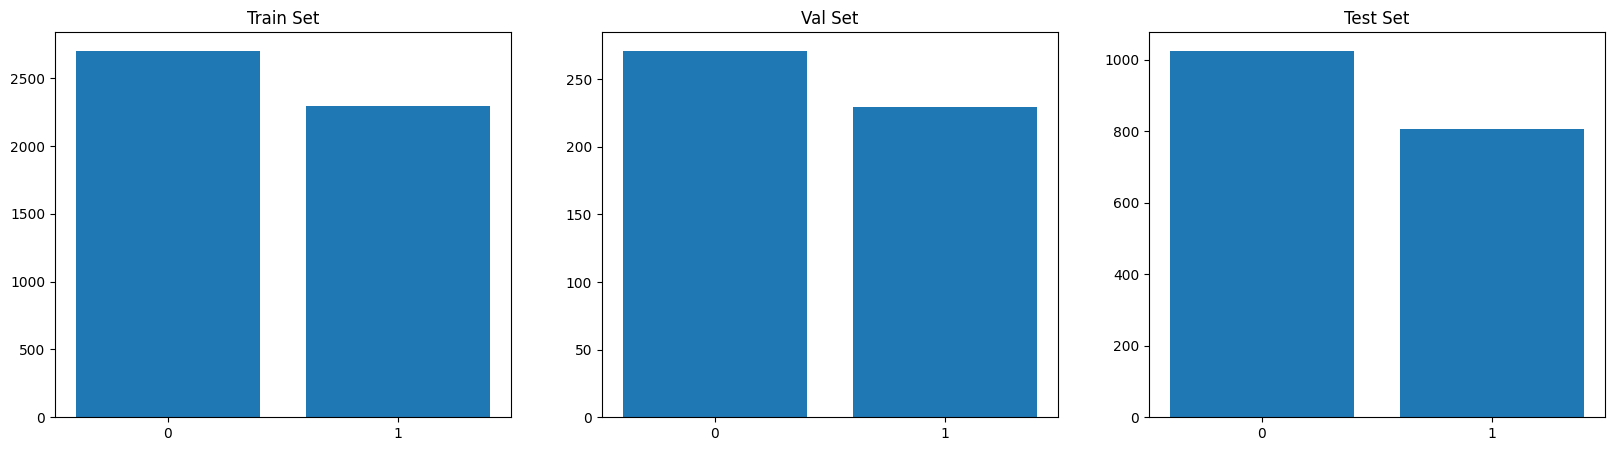

In [25]:
f, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].bar(pd.Series(df_train['Label'].value_counts().index).astype('str'), df_train['Label'].value_counts().values)
ax[0].set_title('Train Set')

ax[1].bar(pd.Series(df_val['Label'].value_counts().index).astype('str'), df_val['Label'].value_counts().values)
ax[1].set_title('Val Set')

ax[2].bar(pd.Series(df_test['Label'].value_counts().index).astype('str'), df_test['Label'].value_counts().values)
ax[2].set_title('Test Set')

plt.show()

# **4. Machine learning models**

In [26]:
X_train = df_train.drop(columns = 'Label')
y_train = df_train['Label']

X_val = df_val.drop(columns = 'Label')
y_val = df_val['Label']

X_test = df_test.drop(columns = 'Label')
y_test = df_test['Label']

In [27]:
from sklearn.model_selection import cross_val_score

def model_accuracy_cv(model, X_test, y_test):
    return cross_val_score(model, X_test, y_test, cv = 10, scoring = 'accuracy').mean()

def model_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)

    c = 0

    for true, pred in zip(y_test, y_pred):
        if true == pred:
            c += 1

    return c / len(y_test)

In [28]:
model_results_cv = {}
model_results = {}

## **4.1. CatBoost - All Features**

In [29]:
import catboost as cb

In [30]:
cat_cols = [col for col in df.columns if (df[col].nunique() <= 2) and (col != 'Label')]

for col in ['RIDRETH1', 'RIDRETH3', 'DMDMARTL', 'RIDEXPRG', 'AIALANGA', 'SDMVPSU', 'DMDHRMAR', 'DMDMARTZ',
            'MCQ530', 'CDQ002', 'PEASCST1', 'BPAARM', 'BMDSTATS', 'PHDSESN']:
  cat_cols.append(col)

In [31]:
model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model.fit(X_train, y_train, cat_features = cat_cols, eval_set = (X_val, y_val), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [32]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['CatBoost - All Features'] = model_accuracy(model, X_test, y_test)

model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model_results_cv['CatBoost - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8117839607201309


## **4.2. Gradient Boosting - All Features**

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Gradient Boosting - All Features'] = model_accuracy(model, X_test, y_test)

model = GradientBoostingClassifier()
model_results_cv['Gradient Boosting - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8057828696126569


## **4.3. XGBoost - All Features**

In [35]:
from xgboost import XGBClassifier

model = XGBClassifier(objective = 'binary:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['XGBoost - All Features'] = model_accuracy(model, X_test, y_test)

model = XGBClassifier(objective = 'binary:logistic')
model_results_cv['XGBoost - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8085106382978723


## **4.4. Logistic Regression - All Features**

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs = -1)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [38]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Logistic Regression - All Features'] = model_accuracy(model, X_test, y_test)

model = LogisticRegression(n_jobs = -1)
model_results_cv['Logistic Regression - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.6863066012002182


## **4.5. Support Vector Machine (SVM) - All Features**

In [39]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [40]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['SVM - All Features'] = model_accuracy(model, X_test, y_test)

model = SVC()
model_results_cv['SVM - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.5979268957992362


## **4.6. Random Forest - All Features**

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [42]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Random Forest - All Features'] = model_accuracy(model, X_test, y_test)

model = RandomForestClassifier(n_jobs = -1)
model_results_cv['Random Forest - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8128750681942172


## **4.7. Feature Selection - 30 Features**

In [43]:
cols = pd.read_csv('Codebook.csv')['Variable Name'].tolist()

cols = [col for col in cols if col not in ['SEQN', 'DMDYRSUS', 'INDFMPIR', 'SDDSRVYR', 'LBDSTBSI', 'BPD035', 'MCQ180A', 'MCQ195']]

X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]

cat_cols = [col for col in cat_cols if col in cols]

In [44]:
model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1)
model.fit(X_train, y_train, cat_features = cat_cols, eval_set = (X_val, y_val), plot = False, verbose = False)

In [45]:
col_info = pd.read_csv('Codebook.csv')
fii = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_}).sort_values(by = 'Importance', ascending = False)

fi = fii.iloc[0:30]

fi = pd.merge(fi, col_info, left_on = 'Feature', right_on = 'Variable Name', how = 'left').drop(columns = ['Variable Name'])

print(tabulate(fi, headers = 'keys', tablefmt = 'psql'))

+----+-----------+--------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+----------------------------------------+
|    | Feature   |   Importance | Variable Description                                                                                                                                                                                                                                       | Data File Name   | Data File Description                  |
|----+-----------+--------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+-

In [46]:
cols = fi['Feature'].tolist()

X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]

cat_cols = [col for col in cat_cols if col in cols]

In [47]:
model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model.fit(X_train, y_train, cat_features = cat_cols, eval_set = (X_val, y_val), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [48]:
fii = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_}).sort_values(by = 'Importance', ascending = False)

fi = fii.iloc[0:30]

fi = pd.merge(fi, col_info, left_on = 'Feature', right_on = 'Variable Name', how = 'left').drop(columns = ['Variable Name'])

fi.to_csv('model_features_mean.csv', index = False)

with open('model_mean.pkl', 'wb') as f:
  pkl.dump(model, f)

In [49]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['CatBoost - 30 Features'] = model_accuracy(model, X_test, y_test)

model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model_results_cv['CatBoost - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.7992362247681397


## **4.8. Gradient Boosting - 30 Features**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Gradient Boosting - 30 Features'] = model_accuracy(model, X_test, y_test)

model = GradientBoostingClassifier()
model_results_cv['Gradient Boosting - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.7937806873977087


## **4.9. XGBoost - 30 Features**

In [52]:
from xgboost import XGBClassifier

model = XGBClassifier(objective = 'binary:logistic', n_jobs = -1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['XGBoost - 30 Features'] = model_accuracy(model, X_test, y_test)

model = XGBClassifier(objective = 'binary:logistic', n_jobs = -1)
model_results_cv['XGBoost - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.8014184397163121


## **4.10. Logistic Regression - 30 Features**

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs = -1)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [55]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Logistic Regression - 30 Features'] = model_accuracy(model, X_test, y_test)

model = LogisticRegression(n_jobs = -1)
model_results_cv['Logistic Regression - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.7730496453900709


## **4.11. Support Vector Machine (SVM) - 30 Features**

In [56]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [57]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['SVM - 30 Features'] = model_accuracy(model, X_test, y_test)

model = SVC()
model_results_cv['SVM - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.7310420076377523


## **4.12. Random Forest - 30 Features**

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [59]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Random Forest - 30 Features'] = model_accuracy(model, X_test, y_test)

model = RandomForestClassifier(n_jobs = -1)
model_results_cv['Random Forest - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.8166939443535188


## **4.13. Total Accuracy**

In [60]:
models = [model.split(' - ')[0] for model in list(model_results.keys())]
features = [model.split(' - ')[1] for model in list(model_results.keys())]
accuracy = list(model_results.values())

df_acc = pd.DataFrame({'Model': models, 'Feature': features, 'Accuracy': accuracy})

df_acc.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

Feature,30 Features,All Features
Model,,
CatBoost,0.799236,0.811784
Gradient Boosting,0.793781,0.805783
Logistic Regression,0.773050,0.686307
Random Forest,0.816694,0.812875
SVM,0.731042,0.597927
XGBoost,0.801418,0.808511


In [61]:
models = [model.split(' - ')[0] for model in list(model_results_cv.keys())]
features = [model.split(' - ')[1] for model in list(model_results_cv.keys())]   
accuracy = list(model_results_cv.values())

df_acc_cv = pd.DataFrame({'Model': models, 'Feature': features, 'Accuracy': accuracy})

df_acc_cv.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

Feature,30 Features,All Features
Model,,
CatBoost,0.827898,0.838398
Gradient Boosting,0.815215,0.818761
Logistic Regression,0.776622,0.681850
Random Forest,0.835537,0.820812
SVM,0.753437,0.584349
XGBoost,0.819987,0.827895


In [62]:
df_acc = df_acc.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

In [63]:
df_acc_cv = df_acc_cv.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

## **4.14. Feature Importance**

In [64]:
from sklearn.feature_selection import mutual_info_classif

# Separate the features and the target variable
X = df.drop(columns = ['Label'])
y = df['Label']

# Calculate the information gain for each feature
feature_importance = mutual_info_classif(X, y)

# Create a dataframe to store the feature importance
fi = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the dataframe by importance in descending order
fi = fi.sort_values(by = 'Importance', ascending = False)

# Print the feature importance
print(fi)

      Feature  Importance
2    RIDAGEYR    0.154657
43   WTINTPRP    0.108594
98    BPQ040A    0.107863
96     BPQ020    0.106107
44   WTMECPRP    0.103813
..        ...         ...
205    LBXSPH    0.000000
112    ALQ101    0.000000
90    MCQ366D    0.000000
86     MCQ560    0.000000
76    MCQ370D    0.000000

[231 rows x 2 columns]


In [65]:
fi[fi['Importance'] > 0.01]

,Feature,Importance
2,RIDAGEYR,0.154657
43,WTINTPRP,0.108594
98,BPQ040A,0.107863
96,BPQ020,0.106107
44,WTMECPRP,0.103813
...,...,...
42,DMDMARTZ,0.010448
179,LBDLDLM,0.010433
50,MCQ080,0.010218
131,BPQ150D,0.010194
